In [4]:
library(car)
library(ggplot2)
library(pastecs)
library(psych)

Loading required package: carData

Attaching package: ‘psych’

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha

The following object is masked from ‘package:car’:

    logit



In [6]:
dlf = read.delim('data/DownloadFestival(No Outlier).dat', header=TRUE)

Warning message:
“Removed 546 rows containing non-finite values (stat_bin).”

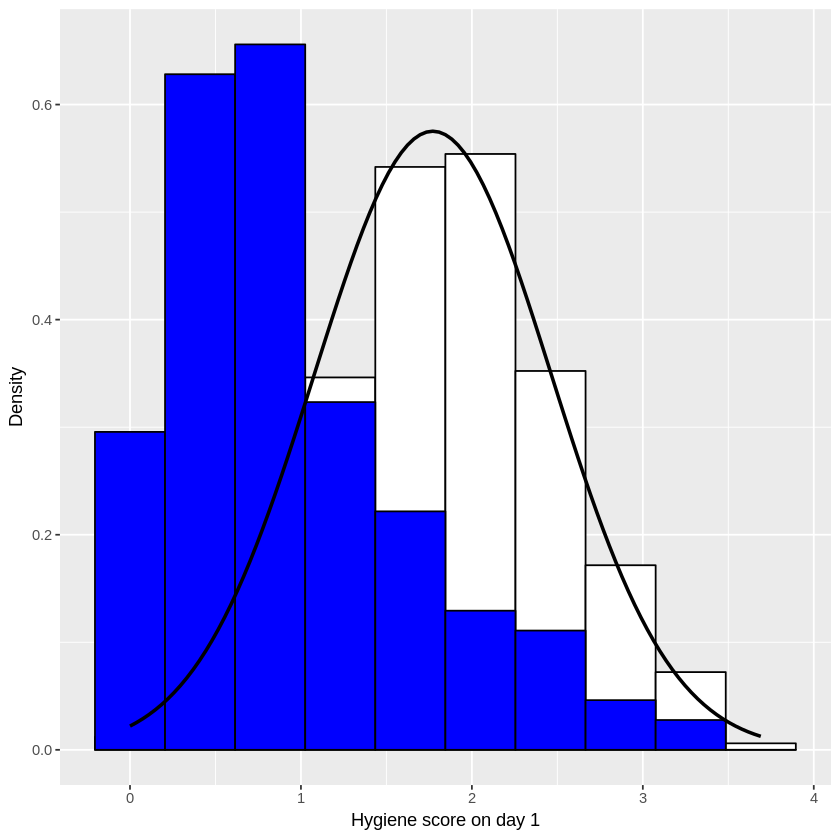

In [13]:
ggplot(dlf, aes(x=day1)) + theme(legend.position='none') +
geom_histogram(aes(y=..density..), color='black', fill='white', bins=10) +
geom_histogram(aes(x=day2, y=..density..), color='black', fill='blue', bins=10) +
labs(x='Hygiene score on day 1', y='Density') +
stat_function(fun=dnorm, args=list(mean=mean(dlf$day1, na.rm=TRUE),
             sd=sd(dlf$day1, na.rm=TRUE)), color='black', size=1)

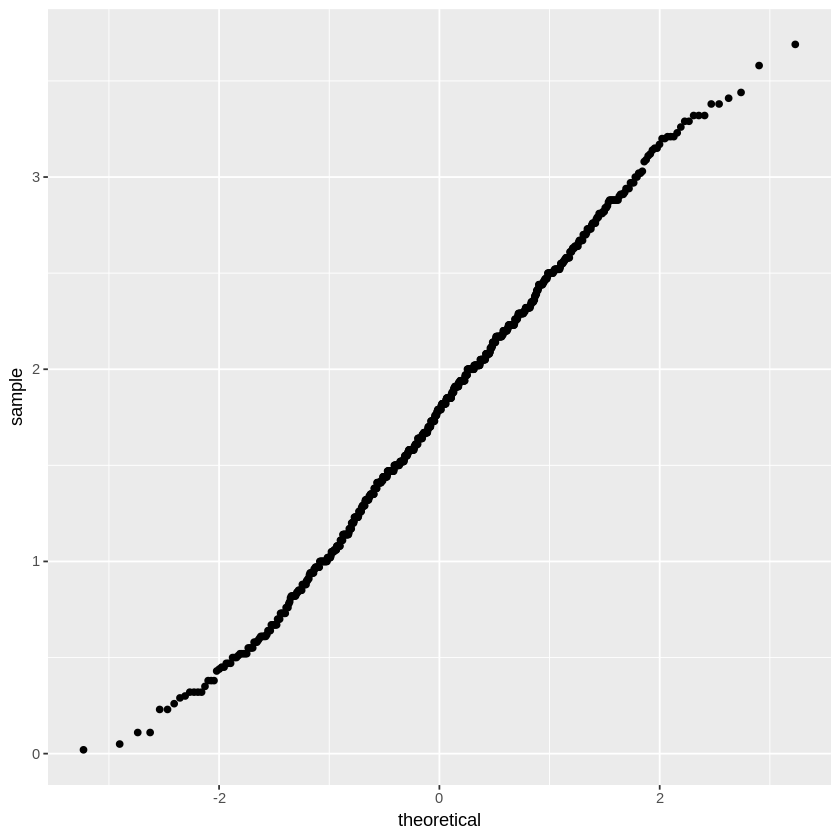

In [19]:
ggplot(dlf, aes(sample=day1)) +
stat_qq()

In [20]:
describe(dlf$day1)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,810,1.771136,0.6935389,1.79,1.771929,0.696822,0.02,3.69,3.67,-0.00442835,-0.4215941,0.02436847


In [22]:
stat.desc(dlf$day1, basic=FALSE, norm=TRUE)

median         mean      SE.mean CI.mean.0.95          var      std.dev 
  1.79000000   1.77113580   0.02436847   0.04783289   0.48099624   0.69353892 
    coef.var     skewness     skew.2SE     kurtosis     kurt.2SE   normtest.W 
  0.39157862  -0.00442835  -0.02577395  -0.42159405  -1.22838457   0.99591522 
  normtest.p 
  0.03198482

In [25]:
describe(cbind(dlf$day1, dlf$day2, dlf$day3))

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,810,1.7711358,0.6935389,1.79,1.7719290,0.696822,0.02,3.69,3.67,-0.00442835,-0.4215941,0.02436847
X2,2,264,0.9609091,0.7207801,0.79,0.8687264,0.607866,0.00,3.44,3.44,1.08281121,0.7554615,0.04436095
X3,3,123,0.9765041,0.7102770,0.76,0.9021212,0.607866,0.02,3.41,3.39,1.00781273,0.5945454,0.06404352


In [29]:
round(stat.desc(cbind(dlf$day1, dlf$day2, dlf$day3), basic=FALSE, norm=TRUE), digits=3)

,V1,V2,V3
median,1.790,0.790,0.760
mean,1.771,0.961,0.977
SE.mean,0.024,0.044,0.064
CI.mean.0.95,0.048,0.087,0.127
var,0.481,0.520,0.504
std.dev,0.694,0.721,0.710
coef.var,0.392,0.750,0.727
skewness,-0.004,1.083,1.008
skew.2SE,-0.026,3.612,2.309
kurtosis,-0.422,0.755,0.595


In [28]:
class(dlf[, c('day1', 'day2', 'day3')])

[1] "data.frame"